In [37]:
#環境確認
import pandas as pd
import numpy as np
import sklearn
!python3 --version
print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)
import matplotlib
print(matplotlib.__version__)

Python 3.6.12 :: Anaconda, Inc.
1.1.1
1.19.1
0.23.2
3.3.1


In [38]:
train_df = pd.read_csv("../data/Processed/train_buki.csv", index_col='id')
test_df = pd.read_csv("../data/Processed/test_buki.csv", index_col="id")
print(train_df.shape)
print(test_df.shape)

(66125, 79)
(28340, 78)


In [39]:
train_df.head()

,period,game-ver,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,A2-weapon,...,subweapon-B3,special-B3,mainweapon-B3,reskin-B3,category1-B4,category2-B4,subweapon-B4,special-B4,mainweapon-B4,reskin-B4
id,,,,,,,,,,,,,,,,,,,,,
1,2019-10-15T20:00:00+00:00,5.0.1,regular,standard,nawabari,sumeshi,sshooter_becchu,NaN,139,soytuber_custom,...,splashbomb,presser,splatcharger,splatcharger,shooter,shooter,quickbomb,kyubanbomb_pitcher,sharp,sharp_neo
2,2019-12-14T04:00:00+00:00,5.0.1,regular,standard,nawabari,arowana,parashelter_sorella,NaN,198,jetsweeper,...,jumpbeacon,bubble,campingshelter,campingshelter,shooter,maneuver,torpedo,chakuchi,sputtery,sputtery_clear
3,2019-12-25T14:00:00+00:00,5.0.1,gachi,standard,hoko,ama,nzap89,a-,114,quadhopper_black,...,splashbomb,nicedama,prime,prime_becchu,shooter,maneuver,splashbomb,amefurashi,dualsweeper,dualsweeper_custom
4,2019-11-11T14:00:00+00:00,5.0.1,regular,standard,nawabari,engawa,bamboo14mk1,NaN,336,splatroller_becchu,...,kyubanbomb,curlingbomb_pitcher,promodeler_mg,promodeler_mg,shooter,blaster,robotbomb,jetpack,hotblaster,hotblaster_custom
5,2019-12-14T06:00:00+00:00,5.0.1,gachi,standard,hoko,chozame,bold_7,x,299,hissen_hue,...,splashbomb,quickbomb_pitcher,bucketslosher,bucketslosher_soda,shooter,shooter,splashbomb,armor,wakaba,wakaba


In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66125 entries, 1 to 66125
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   period         66125 non-null  object 
 1   game-ver       66125 non-null  object 
 2   lobby-mode     66125 non-null  object 
 3   lobby          66125 non-null  object 
 4   mode           66125 non-null  object 
 5   stage          66125 non-null  object 
 6   A1-weapon      66125 non-null  object 
 7   A1-rank        51681 non-null  object 
 8   A1-level       66125 non-null  int64  
 9   A2-weapon      66125 non-null  object 
 10  A2-rank        51681 non-null  object 
 11  A2-level       66125 non-null  float64
 12  A3-weapon      66125 non-null  object 
 13  A3-rank        51681 non-null  object 
 14  A3-level       66125 non-null  float64
 15  A4-weapon      66074 non-null  object 
 16  A4-rank        51638 non-null  object 
 17  A4-level       66074 non-null  float64
 18  B1-wea

### 武器の情報を個人ごとからチームごとに変える
category1, 2を落とす、

他のカテゴリをチームごとにする

reskinそのまま

In [41]:
suffixes = ["-A1", "-A2", "-A3", "-A4", "-B1", "-B2", "-B3", "-B4"]
drop_cols = ["category1", "category2"]

for c in drop_cols:
    for s in suffixes:
        col = c+s
        train_df.drop(col, axis=1, inplace=True)
        test_df.drop(col, axis=1, inplace=True)
        
drop_cols2 = ["period", "game-ver", "A1-weapon", "A2-weapon", "A3-weapon", "A4-weapon", \
              "B1-weapon", "B2-weapon", "B3-weapon", "B4-weapon"]
for col in drop_cols2:
    train_df.drop(col, axis=1, inplace=True)
    test_df.drop(col, axis=1, inplace=True)

In [42]:
train_df.columns

Index(['lobby-mode', 'lobby', 'mode', 'stage', 'A1-rank', 'A1-level',
       'A2-rank', 'A2-level', 'A3-rank', 'A3-level', 'A4-rank', 'A4-level',
       'B1-rank', 'B1-level', 'B2-rank', 'B2-level', 'B3-rank', 'B3-level',
       'B4-rank', 'B4-level', 'y', 'subweapon-A1', 'special-A1',
       'mainweapon-A1', 'reskin-A1', 'subweapon-A2', 'special-A2',
       'mainweapon-A2', 'reskin-A2', 'subweapon-A3', 'special-A3',
       'mainweapon-A3', 'reskin-A3', 'subweapon-A4', 'special-A4',
       'mainweapon-A4', 'reskin-A4', 'subweapon-B1', 'special-B1',
       'mainweapon-B1', 'reskin-B1', 'subweapon-B2', 'special-B2',
       'mainweapon-B2', 'reskin-B2', 'subweapon-B3', 'special-B3',
       'mainweapon-B3', 'reskin-B3', 'subweapon-B4', 'special-B4',
       'mainweapon-B4', 'reskin-B4'],
      dtype='object')

In [43]:
t1 = pd.crosstab(train_df.index, train_df["special-A1"])
t2 = pd.crosstab(train_df.index, train_df["special-A2"])
t3 = pd.crosstab(train_df.index, train_df["special-A3"])
t4 = pd.crosstab(train_df.index, train_df["special-A4"])
for sp in train_df["special-A1"].unique():
    train_df[sp+"-A"] = (t1[sp] + t2[sp] + t3[sp] + t4[sp])            

In [44]:
t1 = pd.crosstab(train_df.index, train_df["special-B1"])
t2 = pd.crosstab(train_df.index, train_df["special-B2"])
t3 = pd.crosstab(train_df.index, train_df["special-B3"])
t4 = pd.crosstab(train_df.index, train_df["special-B4"])
for sp in train_df["special-B1"].unique():
    train_df[sp+"-B"] = (t1[sp] + t2[sp] + t3[sp] + t4[sp])

In [11]:
t1 = pd.crosstab(train_df.index, train_df["mainweapon-A1"])
t2 = pd.crosstab(train_df.index, train_df["mainweapon-A2"])
t3 = pd.crosstab(train_df.index, train_df["mainweapon-A3"])
t4 = pd.crosstab(train_df.index, train_df["mainweapon-A4"])
for sp in train_df["mainweapon-A1"].unique():
    train_df[sp+"-A"] = (t1[sp] + t2[sp] + t3[sp] + t4[sp])    


In [12]:
t1 = pd.crosstab(train_df.index, train_df["mainweapon-B1"])
t2 = pd.crosstab(train_df.index, train_df["mainweapon-B2"])
t3 = pd.crosstab(train_df.index, train_df["mainweapon-B3"])
t4 = pd.crosstab(train_df.index, train_df["mainweapon-B4"])
for sp in train_df["mainweapon-B1"].unique():
    train_df[sp+"-B"] = (t1[sp] + t2[sp] + t3[sp] + t4[sp])    

In [45]:
t1 = pd.crosstab(train_df.index, train_df["subweapon-A1"])
t2 = pd.crosstab(train_df.index, train_df["subweapon-A2"])
t3 = pd.crosstab(train_df.index, train_df["subweapon-A3"])
t4 = pd.crosstab(train_df.index, train_df["subweapon-A4"])
for sp in train_df["subweapon-A1"].unique():
    train_df[sp+"-A"] = (t1[sp] + t2[sp] + t3[sp] + t4[sp])    

In [46]:
t1 = pd.crosstab(train_df.index, train_df["subweapon-B1"])
t2 = pd.crosstab(train_df.index, train_df["subweapon-B2"])
t3 = pd.crosstab(train_df.index, train_df["subweapon-B3"])
t4 = pd.crosstab(train_df.index, train_df["subweapon-B4"])
for sp in train_df["subweapon-B1"].unique():
    train_df[sp+"-B"] = (t1[sp] + t2[sp] + t3[sp] + t4[sp])    

In [47]:
t1 = pd.crosstab(test_df.index, test_df["special-A1"])
t2 = pd.crosstab(test_df.index, test_df["special-A2"])
t3 = pd.crosstab(test_df.index, test_df["special-A3"])
t4 = pd.crosstab(test_df.index, test_df["special-A4"])
for sp in test_df["special-A1"].unique():
    test_df[sp+"-A"] = (t1[sp] + t2[sp] + t3[sp] + t4[sp])            

In [48]:
t1 = pd.crosstab(test_df.index, test_df["special-B1"])
t2 = pd.crosstab(test_df.index, test_df["special-B2"])
t3 = pd.crosstab(test_df.index, test_df["special-B3"])
t4 = pd.crosstab(test_df.index, test_df["special-B4"])
for sp in test_df["special-B1"].unique():
    test_df[sp+"-B"] = (t1[sp] + t2[sp] + t3[sp] + t4[sp])

In [19]:
t1 = pd.crosstab(test_df.index, test_df["mainweapon-A1"])
t2 = pd.crosstab(test_df.index, test_df["mainweapon-A2"])
t3 = pd.crosstab(test_df.index, test_df["mainweapon-A3"])
t4 = pd.crosstab(test_df.index, test_df["mainweapon-A4"])
for sp in test_df["mainweapon-A1"].unique():
    test_df[sp+"-A"] = (t1[sp] + t2[sp] + t3[sp] + t4[sp])   

In [20]:
t1 = pd.crosstab(test_df.index, test_df["mainweapon-B1"])
t2 = pd.crosstab(test_df.index, test_df["mainweapon-B2"])
t3 = pd.crosstab(test_df.index, test_df["mainweapon-B3"])
t4 = pd.crosstab(test_df.index, test_df["mainweapon-B4"])
for sp in test_df["mainweapon-B1"].unique():
    test_df[sp+"-B"] = (t1[sp] + t2[sp] + t3[sp] + t4[sp])  

In [49]:
t1 = pd.crosstab(test_df.index, test_df["subweapon-A1"])
t2 = pd.crosstab(test_df.index, test_df["subweapon-A2"])
t3 = pd.crosstab(test_df.index, test_df["subweapon-A3"])
t4 = pd.crosstab(test_df.index, test_df["subweapon-A4"])
for sp in test_df["subweapon-A1"].unique():
    test_df[sp+"-A"] = (t1[sp] + t2[sp] + t3[sp] + t4[sp])    

In [50]:
t1 = pd.crosstab(test_df.index, test_df["subweapon-B1"])
t2 = pd.crosstab(test_df.index, test_df["subweapon-B2"])
t3 = pd.crosstab(test_df.index, test_df["subweapon-B3"])
t4 = pd.crosstab(test_df.index, test_df["subweapon-B4"])
for sp in test_df["subweapon-B1"].unique():
    test_df[sp+"-B"] = (t1[sp] + t2[sp] + t3[sp] + t4[sp])    

In [51]:
train_df

,lobby-mode,lobby,mode,stage,A1-rank,A1-level,A2-rank,A2-level,A3-rank,A3-level,...,splashshield-B,trap-B,quickbomb-B,curlingbomb-B,pointsensor-B,jumpbeacon-B,kyubanbomb-B,torpedo-B,poisonmist-B,tansanbomb-B
id,,,,,,,,,,,,,,,,,,,,,
1,regular,standard,nawabari,sumeshi,NaN,139,NaN,118.0,NaN,13.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,regular,standard,nawabari,arowana,NaN,198,NaN,77.0,NaN,198.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,gachi,standard,hoko,ama,a-,114,a,68.0,a,225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,regular,standard,nawabari,engawa,NaN,336,NaN,131.0,NaN,189.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,gachi,standard,hoko,chozame,x,299,x,97.0,x,96.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66121,gachi,standard,area,devon,a,66,a,113.0,a+,114.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
66122,gachi,standard,asari,otoro,s+,204,s+,96.0,s+,112.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66123,gachi,standard,hoko,bbass,a+,116,a,86.0,a-,19.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [52]:
test_df

,lobby-mode,lobby,mode,stage,A1-rank,A1-level,A2-rank,A2-level,A3-rank,A3-level,...,sprinkler-B,kyubanbomb-B,trap-B,splashbomb-B,quickbomb-B,torpedo-B,jumpbeacon-B,poisonmist-B,pointsensor-B,tansanbomb-B
id,,,,,,,,,,,,,,,,,,,,,
1,gachi,standard,area,hakofugu,x,174,x,130.0,x,127.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,gachi,standard,asari,anchovy,s+,363,s+,59.0,s+,36.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,gachi,standard,area,mutsugoro,s,116,s,125.0,s,124.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,gachi,standard,asari,devon,s+,192,s+,115.0,s+,171.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,gachi,standard,yagura,anchovy,x,267,x,223.0,x,240.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28336,gachi,standard,yagura,battera,x,67,x,62.0,x,136.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
28337,gachi,standard,yagura,anchovy,c-,25,c-,18.0,c,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28338,gachi,standard,yagura,zatou,x,386,x,136.0,x,198.0,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0


In [53]:
def make_input(train_df_, test_df_, drop_cols_):
    
    for col in test_df_.columns:
        print(col)
        if col in drop_cols_:
            train_df_.drop(col, axis=1, inplace=True)
            test_df_.drop(col, axis=1, inplace=True)
            continue
        elif test_df_[col].dtype in [int, float]:
            df = pd.concat([train_df_[col], test_df_[col]])
            med = df.median()
            train_df_[col].fillna(med, inplace=True)
            test_df_[col].fillna(med, inplace=True)
            continue
        train_df_[col].fillna('none', inplace=True)
        test_df_[col].fillna('none', inplace=True)
        lbl = LabelEncoder()
        obj = list(set(train_df_[col].to_list() + test_df_[col].to_list()))
        lbl.fit(obj)
        train_df_[col] = lbl.transform(train_df_[col])
        test_df_[col] = lbl.transform(test_df_[col])
    
    y = train_df["y"] 
    train_df_.drop("y", axis=1, inplace=True)
    return train_df, test_df, y

In [54]:
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
X, test_X, y = make_input(train_df, test_df, [])

lobby-mode
lobby
mode
stage
A1-rank
A1-level
A2-rank
A2-level
A3-rank
A3-level
A4-rank
A4-level
B1-rank
B1-level
B2-rank
B2-level
B3-rank
B3-level
B4-rank
B4-level
subweapon-A1
special-A1
mainweapon-A1
reskin-A1
subweapon-A2
special-A2
mainweapon-A2
reskin-A2
subweapon-A3
special-A3
mainweapon-A3
reskin-A3
subweapon-A4
special-A4
mainweapon-A4
reskin-A4
subweapon-B1
special-B1
mainweapon-B1
reskin-B1
subweapon-B2
special-B2
mainweapon-B2
reskin-B2
subweapon-B3
special-B3
mainweapon-B3
reskin-B3
subweapon-B4
special-B4
mainweapon-B4
reskin-B4
bubble-A
nicedama-A
kyubanbomb_pitcher-A
jetpack-A
amefurashi-A
chakuchi-A
missile-A
presser-A
armor-A
splashbomb_pitcher-A
quickbomb_pitcher-A
ultrahanko-A
sphere-A
robotbomb_pitcher-A
curlingbomb_pitcher-A
amefurashi-B
chakuchi-B
armor-B
jetpack-B
sphere-B
nicedama-B
missile-B
bubble-B
kyubanbomb_pitcher-B
curlingbomb_pitcher-B
ultrahanko-B
presser-B
robotbomb_pitcher-B
quickbomb_pitcher-B
splashbomb_pitcher-B
kyubanbomb-A
splashbomb-A
sprinkler-

In [55]:
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from lightgbm import LGBMClassifier


random.seed(0)

In [56]:
# 全データを5つに分割
SIZE = X.shape[0]
K = 5

def make_kfolds(SIZE, K):
    # return list object, each element is indices of its fold
    FOLD_SIZE = int(SIZE/K)
    res = []
    indices = [i for i in range(SIZE)]
    for i in range(K-1):
        fold = random.sample(indices, FOLD_SIZE)
        indices = list(set(indices) - set(fold))
        res.append(fold)
    res.append(indices)
    return res

folds = make_kfolds(SIZE, K)
print(len(folds))
for i, fold in enumerate(folds):
    print("fold ", i+1, " size is ", len(fold))
    

    
if SIZE != len(set(sum(folds, []))):
    print("error is occuring in spliting")
else :
    print("successfully split")


5
fold  1  size is  13225
fold  2  size is  13225
fold  3  size is  13225
fold  4  size is  13225
fold  5  size is  13225
successfully split


In [57]:
param = {
    "num_leaves" : 20,
    "n_estimators" : 100,
    "learning_rate" : 0.1,
    "num_iterations" : 50,
    "objective" : "binary",
    "metric" : ["binary_logloss"],
}

THRESHOLD = 0.50
models = []
cv_scores = []
temp = 0

all_indices = sum(folds, [])
for i in range(K):
    valid_indices = folds[i]
    train_indices = list(set(all_indices) - set(valid_indices))
    # print("train ", len(train_indices), " , valid ", len(valid_indices))
    train_X = X.iloc[train_indices].values
    train_y = y.iloc[train_indices].values
    valid_X = X.iloc[valid_indices].values
    valid_y = y.iloc[valid_indices].values
    
    train_data = lgb.Dataset(train_X, label=train_y)
    valid_data = lgb.Dataset(valid_X, label=valid_y)
    
    model = lgb.train(param, train_data, valid_sets=valid_data, early_stopping_rounds=2, verbose_eval=10)
    pred = model.predict(valid_X)
    pred = np.where(pred < THRESHOLD, 0, 1)
    temp += np.sum(pred)
    
    score = accuracy_score(pred, valid_y)
    
    models.append(model)
    cv_scores.append(score)
    
    
print("cv score : ", np.mean(cv_scores))    
print("cv ratio : ", temp / SIZE)

/opt/anaconda3/envs/spla/lib/python3.6/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 2 rounds
[10]	valid_0's binary_logloss: 0.689954
[20]	valid_0's binary_logloss: 0.689074
[30]	valid_0's binary_logloss: 0.688608
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.688563
Training until validation scores don't improve for 2 rounds
[10]	valid_0's binary_logloss: 0.688846
[20]	valid_0's binary_logloss: 0.687591
[30]	valid_0's binary_logloss: 0.687088
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.687012
Training until validation scores don't improve for 2 rounds
[10]	valid_0's binary_logloss: 0.689181
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.688391
Training until validation scores don't improve for 2 rounds
[10]	valid_0's binary_logloss: 0.687662
[20]	valid_0's binary_logloss: 0.686301
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.686033
Training until validation scores don't improve for 2 rounds
[10]	valid_0's binary_logloss: 0.688317


0.5236451652721031
0.519916725852928
0.5213589813075753
0.5165272743258896
0.5205091539457471
0.5203914601408486


array([[<AxesSubplot:title={'center':'pred'}>]], dtype=object)

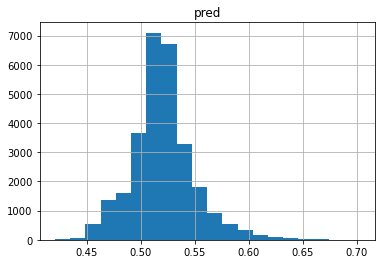

In [58]:
preds = []
for i in range(K):
    model = models[i]
    pred = model.predict(test_X)
    preds.append(pred)
    print(np.sum(pred) / pred.shape[0])
    
preds = np.array(preds)
preds = np.mean(preds, axis=0)
print(np.sum(preds) / preds.shape[0])


temp = pd.DataFrame({"pred":pred})
temp.hist(bins=20)

In [59]:
preds = np.where(preds < THRESHOLD, 0, 1)
print(np.sum(preds) / preds.shape[0])

submit_df = pd.DataFrame({'y': preds})
submit_df.index.name = 'id'
# submit_df.to_csv('Submissions/submission5.csv')

0.815984474241355
